In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

from constants import *

random_state = 101
path_import_and_export = "../../../Thesis_data/processed_data/"

In [3]:
ontime_reporting_export = pd.read_csv(path_import_and_export + "ontime_reporting_export.csv", dtype=dtypes)

In [ ]:
#Check percent of missing data
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM              17.05
ORIGIN_AIRPORT_ID      0.00
ORIGIN_CITY_NAME       0.00
CRS_DEP_TIME           0.00
DEP_DEL15             18.22
CRS_ARR_TIME           0.00
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR      17.05
NUMBER_OF_SEATS       17.05
AWND                   0.03
PRCP                   0.03
SNOW                  29.62
SNWD                  31.99
TMAX                   0.01
MEDIAN_AGE             0.00
TOT_POP                0.00
AVG_HOUSEHOLD_SIZE     0.00
ORIGIN_LAT             0.00
ORIGIN_LONG            0.00
DEST_LAT               0.00
DEST_LONG              0.00
dtype: float64

<AxesSubplot: >

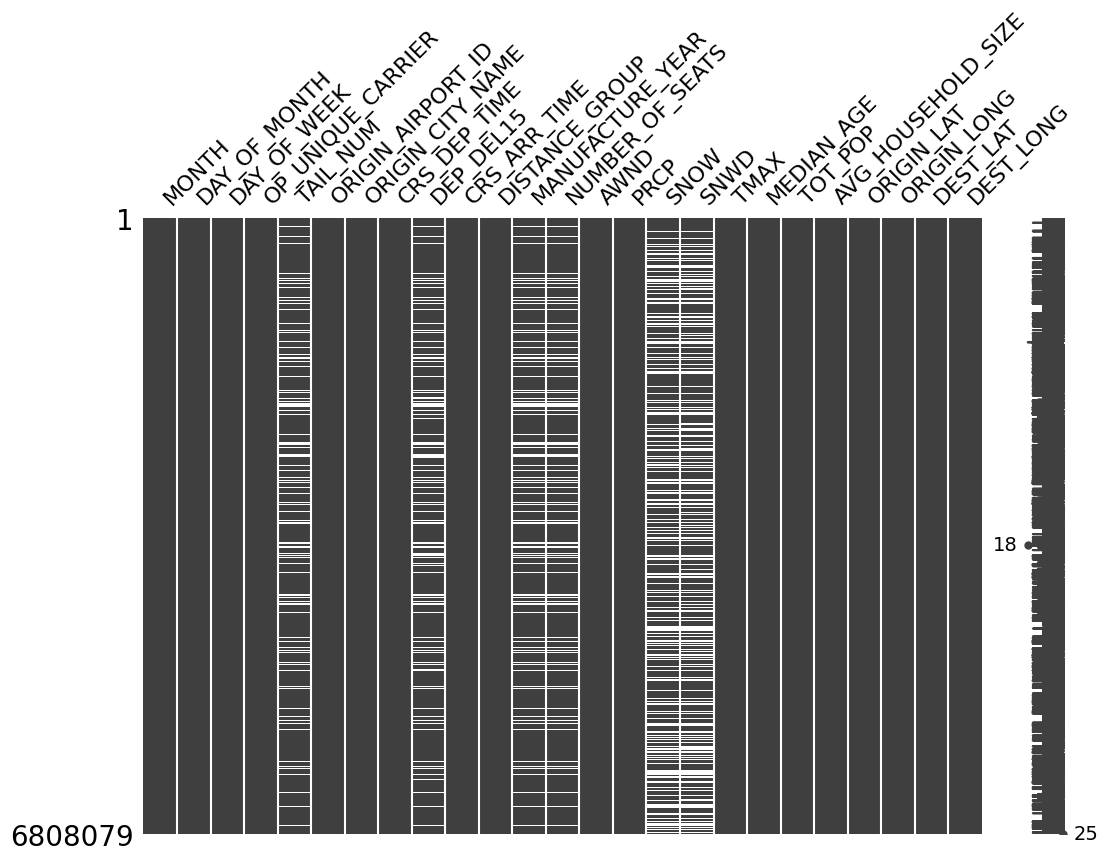

In [ ]:
#A matrix to help visualize the missing data and how it correlates per row
msno.matrix(ontime_reporting_export, figsize=(12, 8))

In [ ]:
pd.set_option('display.max_columns', None)
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew(numeric_only=True).rename('skew'),
                      df.kurt(numeric_only=True).rename('kurt'),
                      df.median(numeric_only=True).rename('median'),
                     ], axis=1).T

ontime_explained = describe(ontime_reporting_export)
ontime_explained

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,MANUFACTURE_YEAR,NUMBER_OF_SEATS,AWND,PRCP,SNOW,SNWD,TMAX,MEDIAN_AGE,TOT_POP,AVG_HOUSEHOLD_SIZE,ORIGIN_LAT,ORIGIN_LONG,DEST_LAT,DEST_LONG
count,6808079.0,6808079.0,6808079.0,6808079.0,6808079.0,5567978.0,6808079.0,5647205.0,5647205.0,6806083.0,6806249.0,4791501.0,4629982.0,6807654.0,6808079.0,6808079.0,6808079.0,6808079.0,6808079.0,6808079.0,6808079.0
mean,6.287414,15.920284,3.885163,12682.074171,1333.344887,0.18879,1493.482066,2007.459978,133.727513,8.604056,0.123657,0.171586,0.339708,69.649974,34.473752,1335056.941475,2.519376,37.306972,-93.444384,37.026281,-93.876385
std,3.404707,8.87108,1.983741,1510.331119,501.372481,0.391342,530.367123,7.068269,46.98033,3.975028,0.373,0.935256,1.5695,19.819699,2.051813,1823620.920082,0.284209,5.23522,16.668574,5.462346,17.169158
min,1.0,1.0,1.0,10140.0,1.0,0.0,1.0,1987.0,44.0,0.0,0.0,0.0,0.0,-10.0,29.9,71109.0,2.08,25.7932,-149.996,18.4949,-176.646
25%,3.0,8.0,2.0,11278.0,904.0,0.0,1100.0,2002.0,79.0,5.82,0.0,0.0,0.0,57.0,33.7,410935.0,2.37,33.6367,-106.609,33.4343,-106.378
50%,6.0,16.0,4.0,12892.0,1325.0,0.0,1520.0,2007.0,143.0,7.83,0.0,0.0,0.0,73.0,34.2,672228.0,2.51,38.8522,-87.9047,37.619,-87.9047
75%,9.0,23.0,6.0,13930.0,1745.0,0.0,1932.0,2014.0,173.0,10.51,0.04,0.0,0.0,85.0,35.3,1469824.0,2.66,40.7884,-80.9431,40.775,-80.9431
max,12.0,31.0,7.0,15919.0,2359.0,1.0,2400.0,2019.0,337.0,33.78,11.63,17.2,25.2,115.0,42.8,8550405.0,4.58,61.1744,-70.3093,71.2854,-67.1294
skew,0.087414,-0.011685,0.094511,0.012475,0.068569,1.590474,-0.323058,-0.104802,-0.189869,1.393957,8.050975,7.082069,6.34403,-0.723754,1.299443,2.89579,2.7832,-0.08824,-0.60768,-0.058599,-0.824337
kurt,-1.18829,-1.191367,-1.195216,-1.315952,-1.083824,0.529607,-0.453494,-0.947501,-0.464424,4.006545,138.056884,57.432428,51.928624,0.37798,3.591691,8.410634,17.383144,0.4151,-0.849237,0.918715,0.172751


<AxesSubplot: >

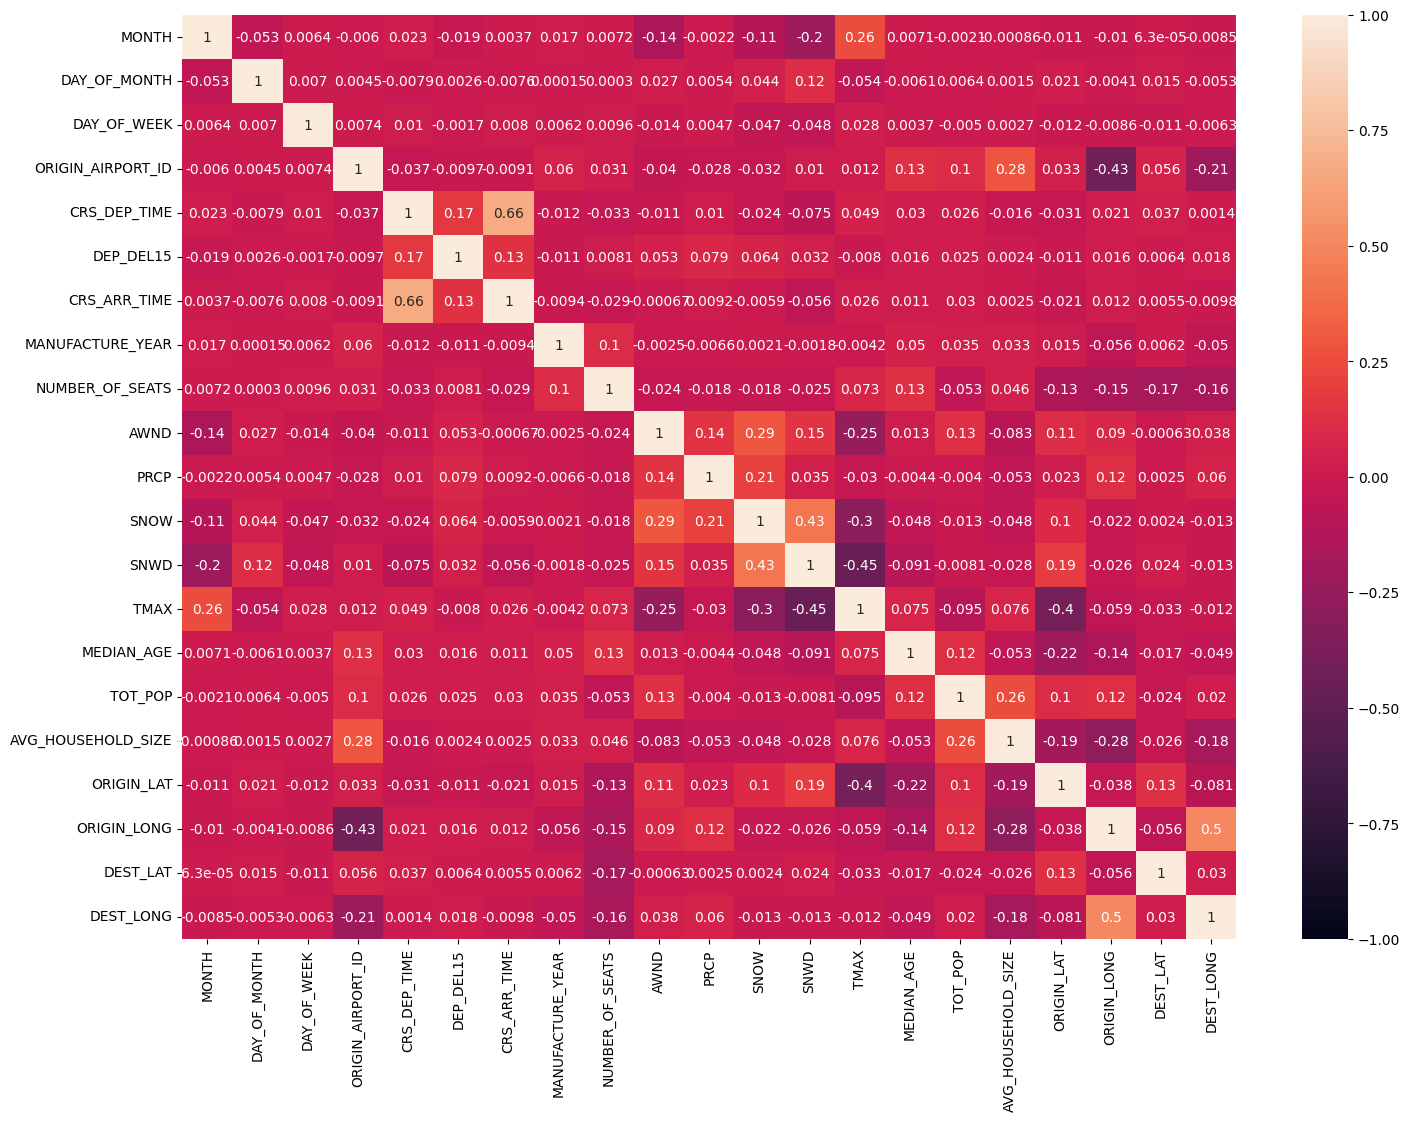

In [ ]:
plt.figure(figsize=(17, 12))
sns.heatmap(ontime_reporting_export.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

# 1. Cleaning missing data
## 1.1 Cleaning missing: Dependant variable (DEP_DEL15)

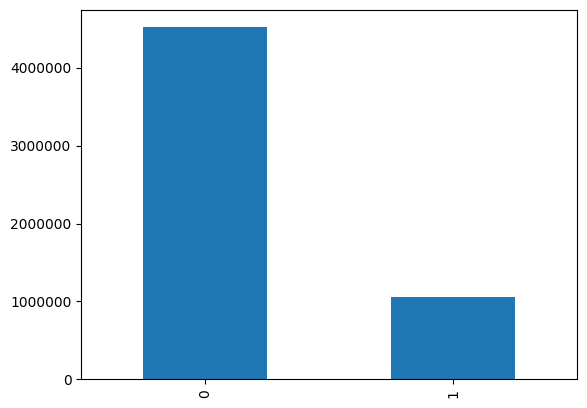

0: 66.34% and 1: 15.44%


In [ ]:
plt.ticklabel_format(style='plain')
ontime_reporting_export["DEP_DEL15"] = ontime_reporting_export["DEP_DEL15"]
ontime_reporting_export["DEP_DEL15"].value_counts().plot(kind='bar')
plt.show()
print("0: {}% and 1: {}%".format(
    round(len(ontime_reporting_export[ontime_reporting_export.DEP_DEL15 == 0])/len(ontime_reporting_export.DEP_DEL15)*100,2), 
    round(len(ontime_reporting_export[ontime_reporting_export.DEP_DEL15 == 1])/len(ontime_reporting_export.DEP_DEL15)*100,2)
    )
)

In [4]:
#Deleting empty DEP_DEL15 records as this is the target value and imputing doesnt make sense here as it would only introduce noise
ontime_reporting_export = ontime_reporting_export.dropna(subset=['DEP_DEL15'])
round(ontime_reporting_export.isnull().sum() * 100 / len(ontime_reporting_export), 2)

MONTH                  0.00
DAY_OF_MONTH           0.00
DAY_OF_WEEK            0.00
OP_UNIQUE_CARRIER      0.00
TAIL_NUM               0.00
ORIGIN_AIRPORT_ID      0.00
ORIGIN_CITY_NAME       0.00
CRS_DEP_TIME           0.00
DEP_DEL15              0.00
CRS_ARR_TIME           0.00
DISTANCE_GROUP         0.00
MANUFACTURE_YEAR       0.00
NUMBER_OF_SEATS        0.00
AWND                   0.01
PRCP                   0.03
SNOW                  29.95
SNWD                  32.38
TMAX                   0.01
MEDIAN_AGE             0.00
TOT_POP                0.00
AVG_HOUSEHOLD_SIZE     0.00
ORIGIN_LAT             0.00
ORIGIN_LONG            0.00
DEST_LAT               0.00
DEST_LONG              0.00
dtype: float64

<AxesSubplot: >

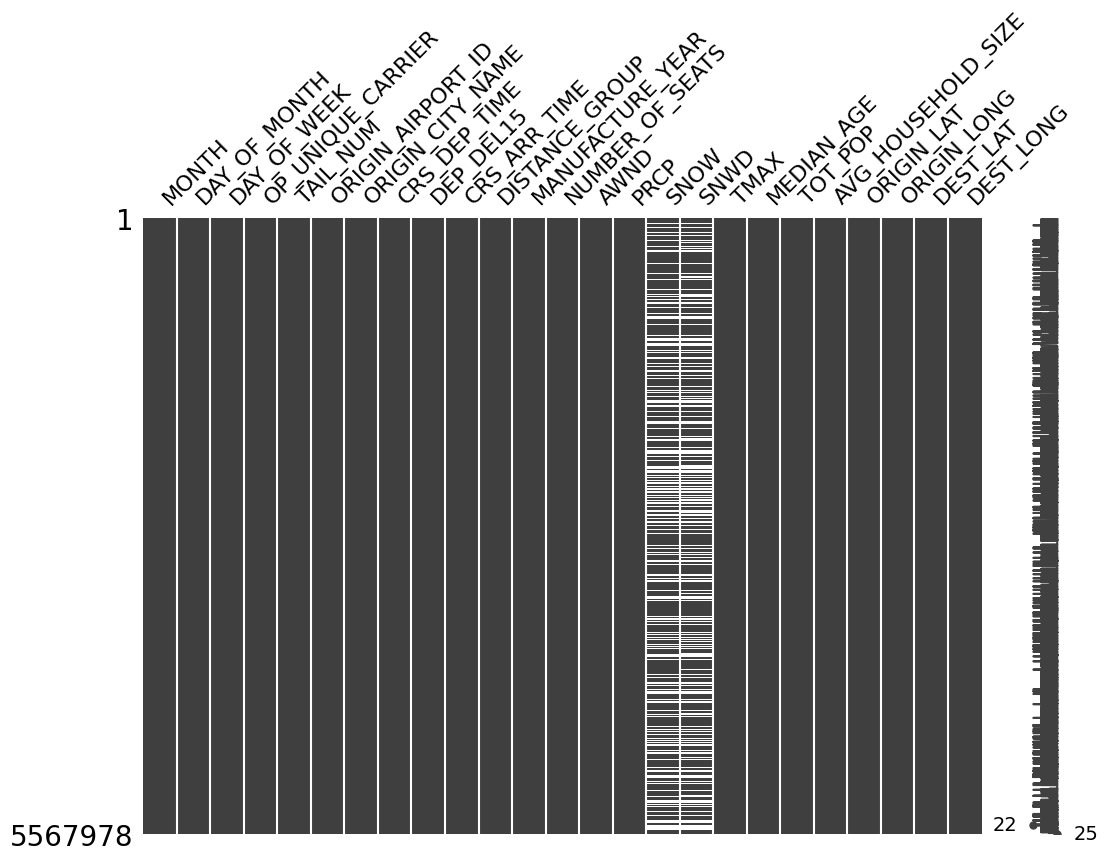

In [4]:
msno.matrix(ontime_reporting_export, figsize=(12, 8))

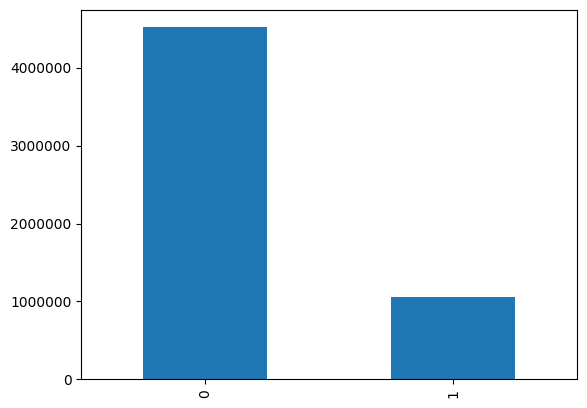

0: 81.12% and 1: 18.88%


In [8]:
plt.ticklabel_format(style='plain')
ontime_reporting_export["DEP_DEL15"] = ontime_reporting_export["DEP_DEL15"]
ontime_reporting_export["DEP_DEL15"].value_counts().plot(kind='bar')
plt.show()
print("0: {}% and 1: {}%".format(
    round(len(ontime_reporting_export[ontime_reporting_export.DEP_DEL15 == 0])/len(ontime_reporting_export.DEP_DEL15)*100,2), 
    round(len(ontime_reporting_export[ontime_reporting_export.DEP_DEL15 == 1])/len(ontime_reporting_export.DEP_DEL15)*100,2)
    )
)

## 1.2 Cleaning missing: Weather data

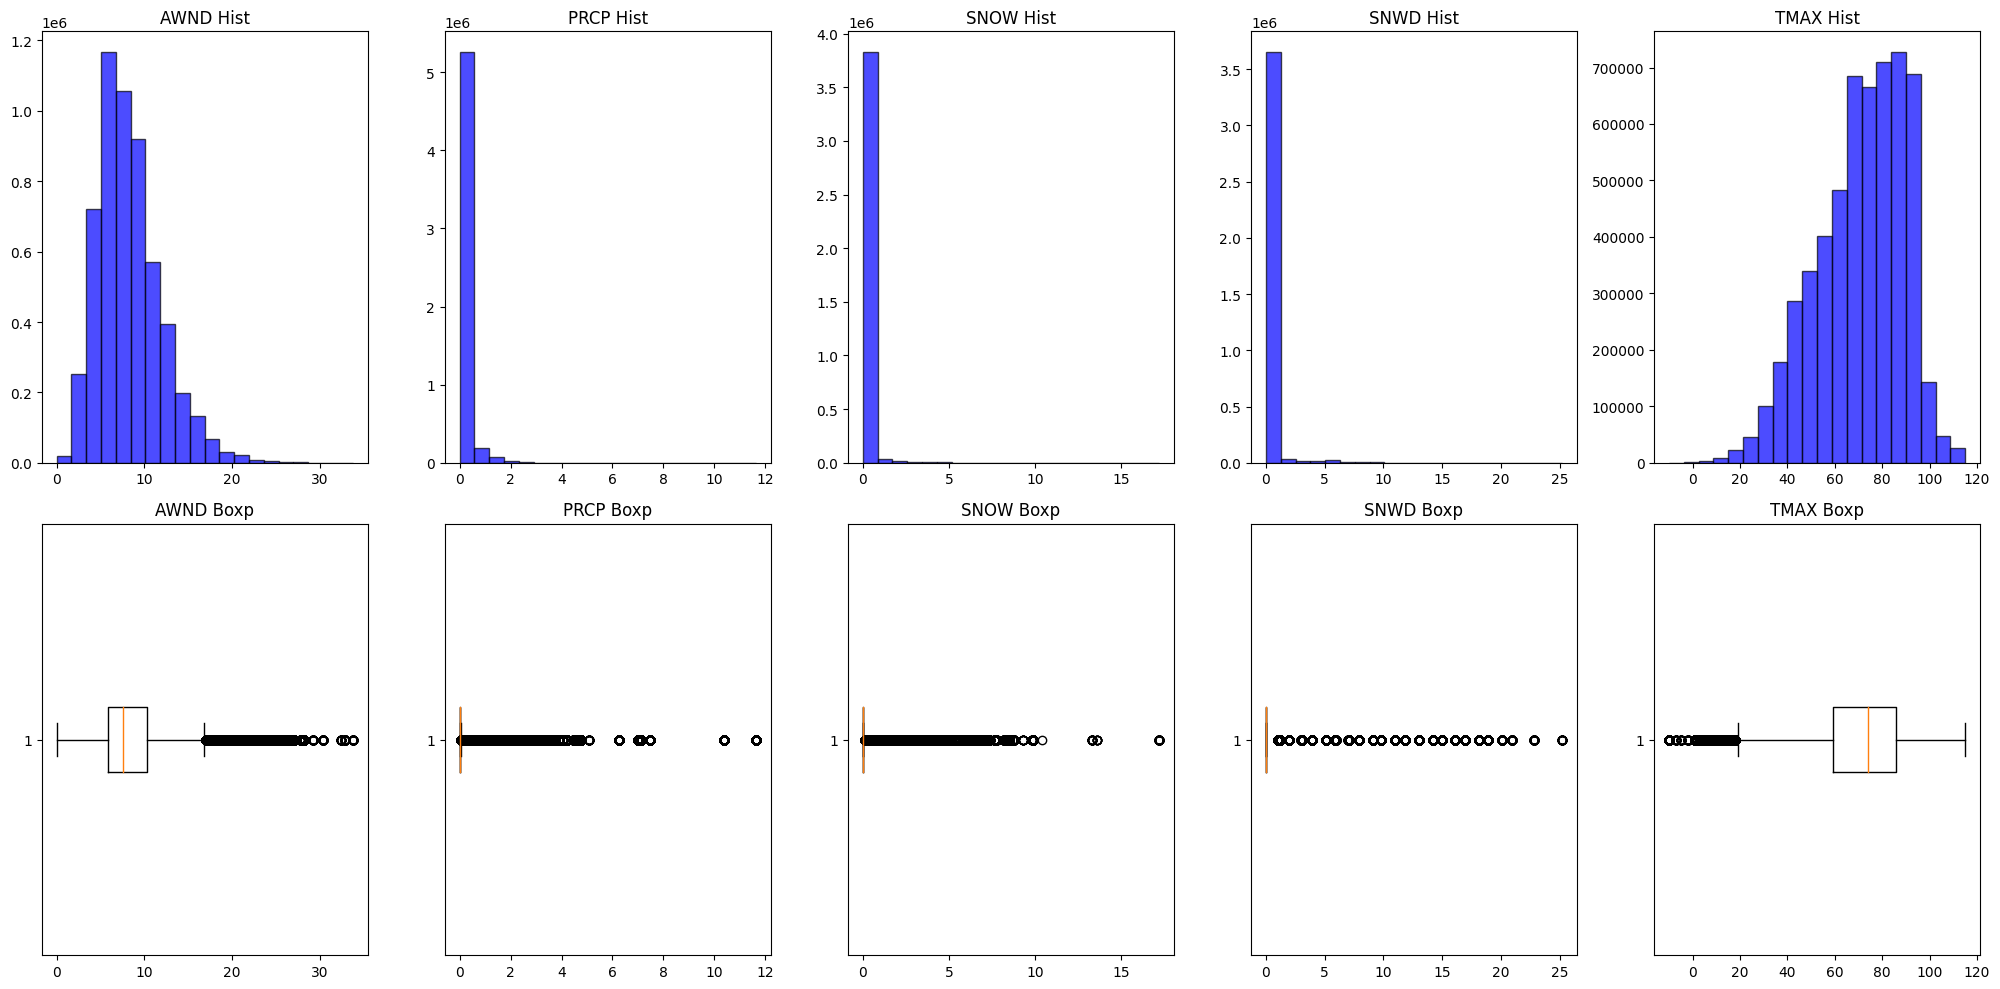

In [9]:
#Visualizing weather related distributions + boxplot
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # 1 rows, 5 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["AWND","PRCP","SNOW","SNWD","TMAX"]]

for i, col in enumerate(columns):
    data = ontime_reporting_export[col]

    axs[i].hist(data[~data.isna()], bins=20, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

for i, col in enumerate(columns):
    data = ontime_reporting_export[col]

    axs[i + len(columns.columns)].boxplot(data[~data.isna()], vert=False)
    axs[i + len(columns.columns)].set_title(col + ' Boxp')

plt.tight_layout()
plt.show()

In [25]:
#Misisng weather data for each airport ID where one or more features have missing data
#pd.set_option('display.max_rows', None)
missing_summary = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID")[["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]].apply(lambda x: x.isnull().sum())
missing_summary.columns = ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]
missing_summary = missing_summary[missing_summary.any(axis=1)]
missing_summary.reset_index(inplace=True)

total_rows = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID").size()
total_rows.name = "Total_Rows"

result_df = missing_summary.merge(total_rows, on="ORIGIN_AIRPORT_ID")

result_df

,ORIGIN_AIRPORT_ID,AWND,PRCP,SNOW,SNWD,TMAX,Total_Rows
0,10257,0,29,0,0,0,10932
1,10693,0,0,77722,77722,0,77722
2,10721,0,0,0,144590,0,144590
3,11066,0,0,45547,45440,133,45547
4,11193,0,96,42865,42865,0,42865
5,11267,0,0,12183,12155,0,12219
6,11618,302,0,0,0,0,115587
7,11697,0,0,81199,81460,0,89035
8,12191,0,0,52496,52496,0,57118
9,12266,0,0,145907,145907,0,145907


In [26]:
#Replace NA's in columns (SNOW) and (SNWD) with 0 only if both are missing, the assumption is that it did not snow that day
#If one of the two is missing it could be a missing entry and so it will be imputed using MICE in the next code block
#ontime_reporting_export.loc[(ontime_reporting_export['SNOW'].isna()) & (ontime_reporting_export['SNWD'].isna())] = 0.0
print(round(ontime_reporting_export[["SNOW","SNWD"]].isnull().sum() * 100 / len(ontime_reporting_export), 2))
temp = (ontime_reporting_export['SNOW'].isna()) & (ontime_reporting_export['SNWD'].isna())
ontime_reporting_export['SNOW'].loc[temp] = 0.0
ontime_reporting_export['SNWD'].loc[temp] = 0.0

round(ontime_reporting_export[["SNOW","SNWD"]].isnull().sum() * 100 / len(ontime_reporting_export), 2)

SNOW    29.95
SNWD    32.38
dtype: float64


SNOW    0.17
SNWD    2.60
dtype: float64

In [21]:
#Misisng weather data for each airport ID where one or more features have missing data
#pd.set_option('display.max_rows', None)
missing_summary = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID")[["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]].apply(lambda x: x.isnull().sum())
missing_summary.columns = ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]
missing_summary = missing_summary[missing_summary.any(axis=1)]
missing_summary.reset_index(inplace=True)

total_rows = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID").size()
total_rows.name = "Total_Rows"

result_df = missing_summary.merge(total_rows, on="ORIGIN_AIRPORT_ID")

result_df

,ORIGIN_AIRPORT_ID,AWND,PRCP,SNOW,SNWD,TMAX,Total_Rows
0,10257,0,29,0,0,0,10932
1,10721,0,0,0,144590,0,144590
2,11066,0,0,107,0,133,45547
3,11193,0,96,0,0,0,42865
4,11267,0,0,28,0,0,12219
5,11618,302,0,0,0,0,115587
6,11697,0,0,0,261,0,89035
7,13796,0,584,0,0,0,50380
8,14122,0,98,0,0,0,47751
9,14635,0,272,1573,0,51,33086


In [28]:
#Generate a proporational number of each feature missing compared to the number of rows for a airport
#As an example: for airport ID 10257, ~0.26 procent of the precipitation is missing of all the rows of the airport 10257
missing_summary = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID")[["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]].apply(lambda x: x.isnull().sum())

total_rows = ontime_reporting_export.groupby("ORIGIN_AIRPORT_ID").size()

summary = pd.concat([missing_summary, total_rows], axis=1)

summary["Proportion_Missing_AWND"] = (summary["AWND"] / summary[0] * 100).round(2)
summary["Proportion_Missing_PRCP"] = (summary["PRCP"] / summary[0] * 100).round(2)
summary["Proportion_Missing_SNOW"] = (summary["SNOW"] / summary[0] * 100).round(2)
summary["Proportion_Missing_SNWD"] = (summary["SNWD"] / summary[0] * 100).round(2)
summary["Proportion_Missing_TMAX"] = (summary["TMAX"] / summary[0] * 100).round(2)

summary = summary[["Proportion_Missing_AWND", "Proportion_Missing_PRCP", "Proportion_Missing_SNOW", "Proportion_Missing_SNWD", "Proportion_Missing_TMAX"]]

summary = summary[~(summary.iloc[:, 0:5] == 0.000000).all(axis=1)]

summary.reset_index(inplace=True)

summary

,ORIGIN_AIRPORT_ID,Proportion_Missing_AWND,Proportion_Missing_PRCP,Proportion_Missing_SNOW,Proportion_Missing_SNWD,Proportion_Missing_TMAX
0,10257,0.00,0.27,0.00,0.00,0.00
1,10721,0.00,0.00,0.00,100.00,0.00
2,11066,0.00,0.00,0.23,0.00,0.29
3,11193,0.00,0.22,0.00,0.00,0.00
4,11267,0.00,0.00,0.23,0.00,0.00
5,11618,0.26,0.00,0.00,0.00,0.00
6,11697,0.00,0.00,0.00,0.29,0.00
7,13796,0.00,1.16,0.00,0.00,0.00
8,14122,0.00,0.21,0.00,0.00,0.00
9,14635,0.00,0.82,4.75,0.00,0.15


In [11]:
#Using a multivariate imputer to fill the other missing weather data using all the relevant columns from that dataset
#In theory this would be the most accurate imputation method as it depends on the other weather feature which would have an influence on the imputed value
#This would be more accurate instead of taking the mean/median/mode
print(round(ontime_reporting_export[["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]].isnull().sum() * 100 / len(ontime_reporting_export), 2))
MI_columns = ontime_reporting_export.loc[:, ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]]

Multivariate_imputer = IterativeImputer(random_state=random_state)
df_imputed = Multivariate_imputer.fit_transform(MI_columns)

#Replace NA's with imputed values
ontime_reporting_export.loc[:, ["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]] = df_imputed
round(ontime_reporting_export[["AWND", "PRCP", "SNOW", "SNWD", "TMAX"]].isnull().sum() * 100 / len(ontime_reporting_export), 2)

AWND    0.01
PRCP    0.03
SNOW    0.17
SNWD    2.60
TMAX    0.01
dtype: float64


AWND    0.0
PRCP    0.0
SNOW    0.0
SNWD    0.0
TMAX    0.0
dtype: float64

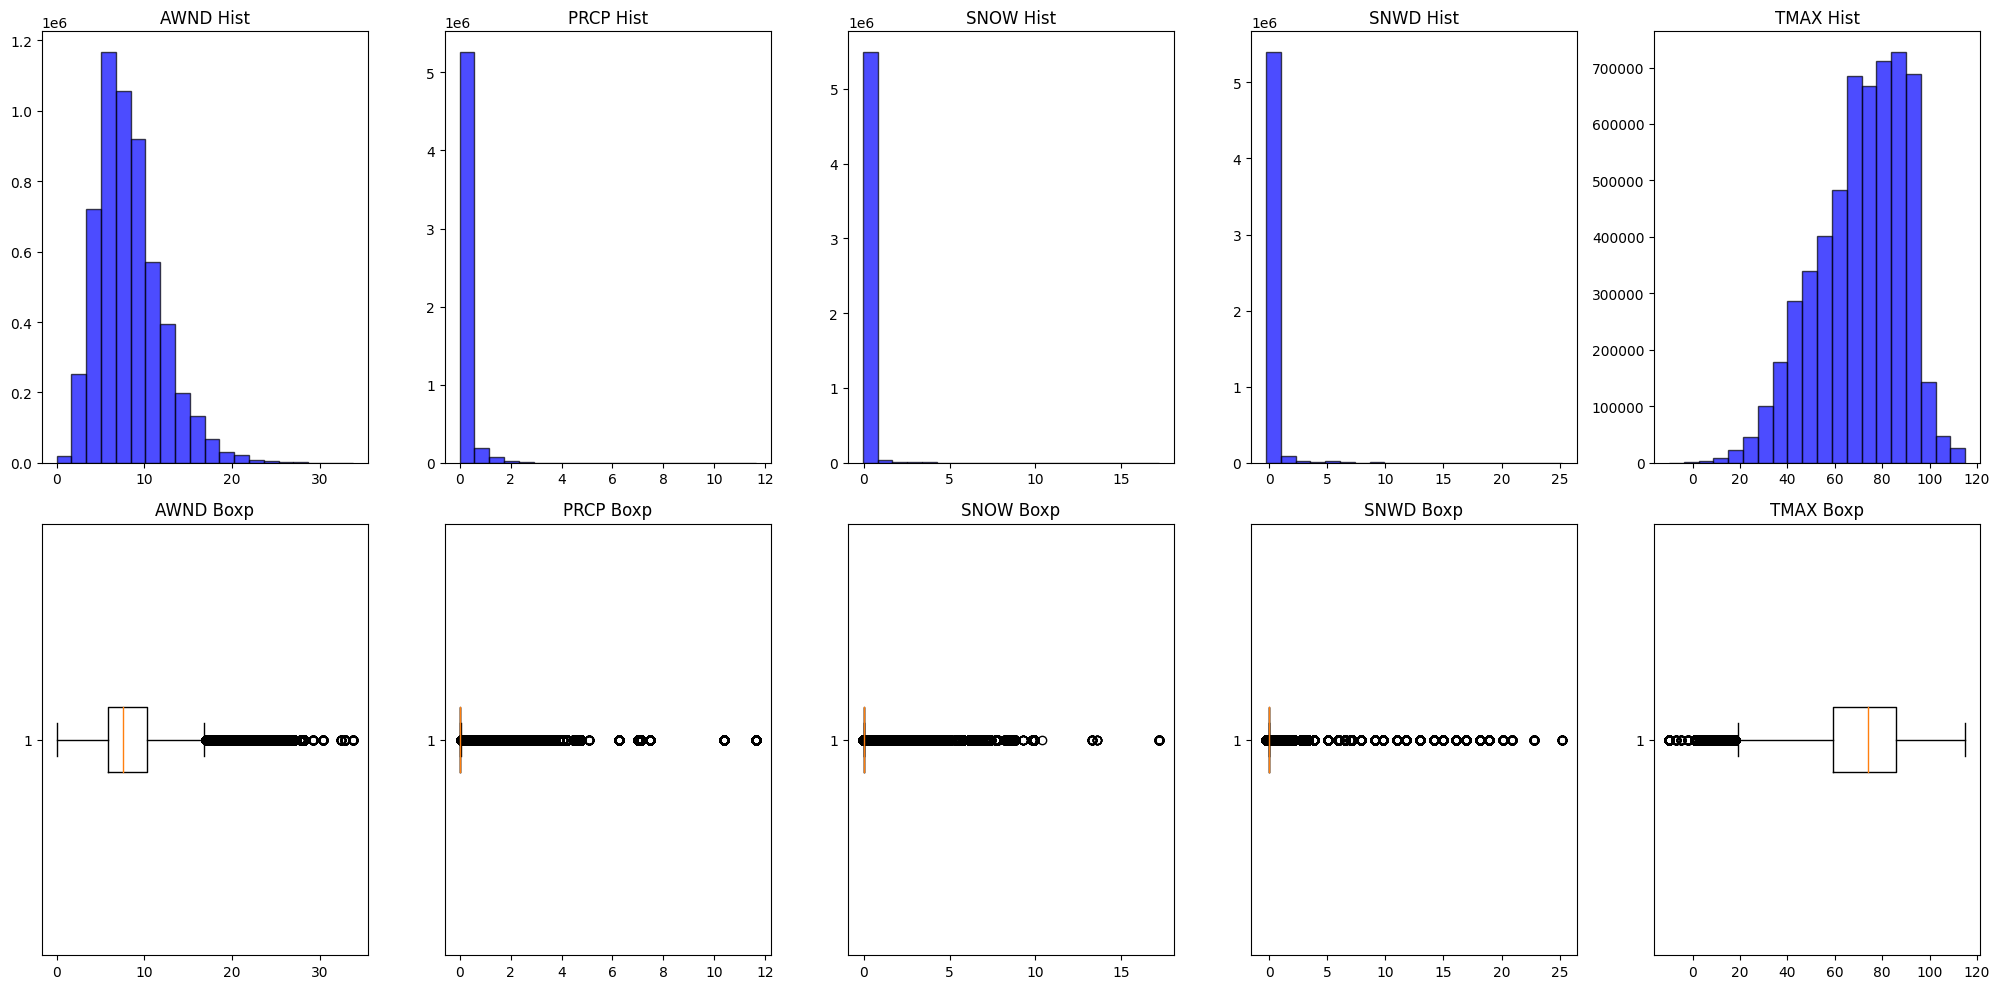

In [12]:
#Visualizing weather related distributions + boxplot
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 5, figsize=(20, 10))  # 1 rows, 5 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["AWND","PRCP","SNOW","SNWD","TMAX"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=20, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

for i, col in enumerate(columns):
    axs[i + len(columns.columns)].boxplot(ontime_reporting_export[col], vert=False)
    axs[i + len(columns.columns)].set_title(col + ' Boxp')

plt.tight_layout()
plt.show()

# 2. More EDA

<AxesSubplot: >

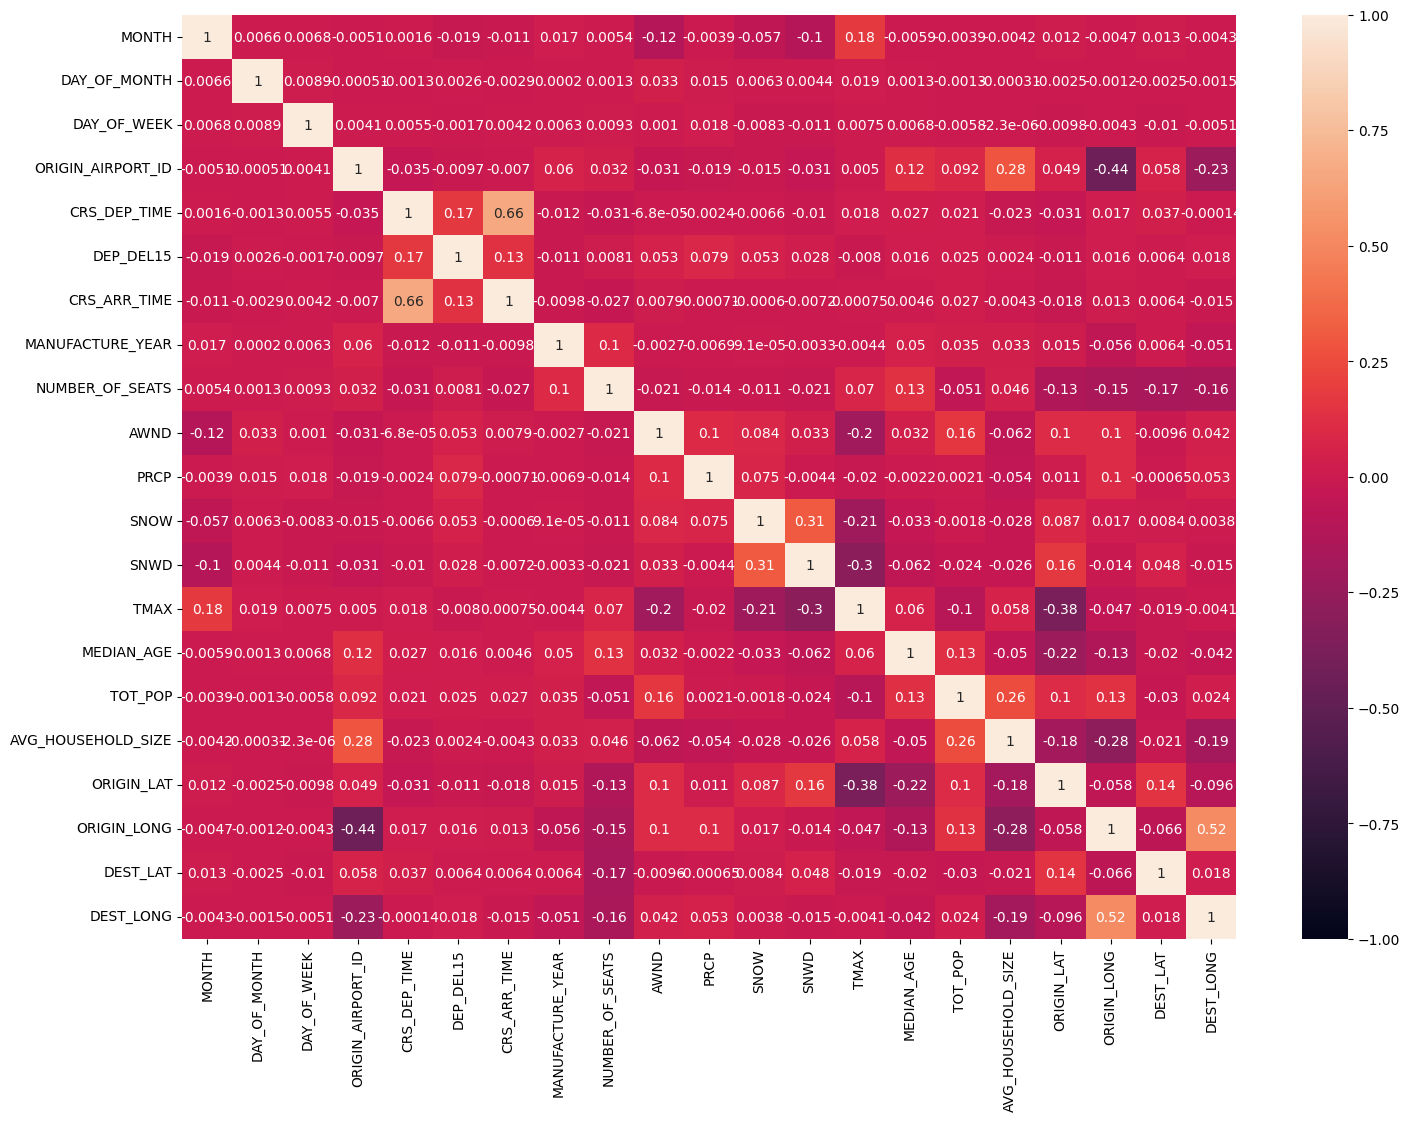

In [13]:
plt.figure(figsize=(17, 12))
sns.heatmap(ontime_reporting_export.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

In [15]:
pd.set_option('display.max_columns', None)
def describe(df):
    return pd.concat([df.describe().T,
                      df.skew(numeric_only=True).rename('skew'),
                      df.kurt(numeric_only=True).rename('kurt'),
                      df.median(numeric_only=True).rename('median'),
                     ], axis=1).T

ontime_explained = describe(ontime_reporting_export)
ontime_explained

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN_AIRPORT_ID,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,MANUFACTURE_YEAR,NUMBER_OF_SEATS,AWND,PRCP,SNOW,SNWD,TMAX,MEDIAN_AGE,TOT_POP,AVG_HOUSEHOLD_SIZE,ORIGIN_LAT,ORIGIN_LONG,DEST_LAT,DEST_LONG
count,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0,5567978.0
mean,6.610658,15.720746,3.931788,12677.499365,1341.408736,0.18879,1499.456145,2007.458171,133.96117,8.281226,0.104149,0.035288,0.110472,70.938373,34.487292,1359882.345078,2.518908,37.301687,-93.595565,37.059201,-94.044835
std,3.405101,8.757593,1.993959,1524.836933,496.651662,0.391342,525.542749,7.082947,46.93344,3.59202,0.347236,0.338374,0.805775,18.498759,2.06134,1895157.886408,0.290948,5.278948,16.85018,5.544198,17.468674
min,1.0,1.0,1.0,10140.0,1.0,0.0,1.0,1987.0,44.0,0.0,0.0,-0.063442,-0.272692,-10.0,29.9,71109.0,2.08,25.7932,-149.996,18.4949,-176.646
25%,4.0,8.0,2.0,11278.0,917.0,0.0,1107.0,2002.0,79.0,5.82,0.0,0.0,0.0,59.0,33.7,419278.0,2.36,33.6367,-111.978,33.4343,-110.941
50%,7.0,16.0,4.0,12892.0,1330.0,0.0,1525.0,2007.0,143.0,7.61,0.0,0.0,0.0,74.0,34.2,672228.0,2.51,37.7213,-87.9047,37.619,-87.9047
75%,10.0,23.0,6.0,13931.0,1746.0,0.0,1931.0,2014.0,173.0,10.29,0.02,0.0,0.0,86.0,35.5,1469824.0,2.66,40.7884,-80.9431,40.7884,-80.9431
max,12.0,31.0,7.0,15919.0,2359.0,1.0,2400.0,2019.0,337.0,33.78,11.63,17.2,25.2,115.0,42.8,8550405.0,4.58,61.1744,-70.3093,71.2854,-67.1294
skew,-0.034319,0.007082,0.052786,0.011415,0.065976,1.590474,-0.339053,-0.107188,-0.191745,0.980351,9.746687,15.769649,11.636132,-0.535958,1.29199,2.825079,2.733643,-0.006302,-0.60655,0.008739,-0.836277
kurt,-1.179211,-1.18572,-1.221705,-1.321239,-1.061618,0.529607,-0.394664,-0.9498,-0.451204,1.514085,196.295128,340.978003,179.393352,-0.210101,3.510566,7.712598,16.625047,0.543451,-0.861613,1.095024,0.18224


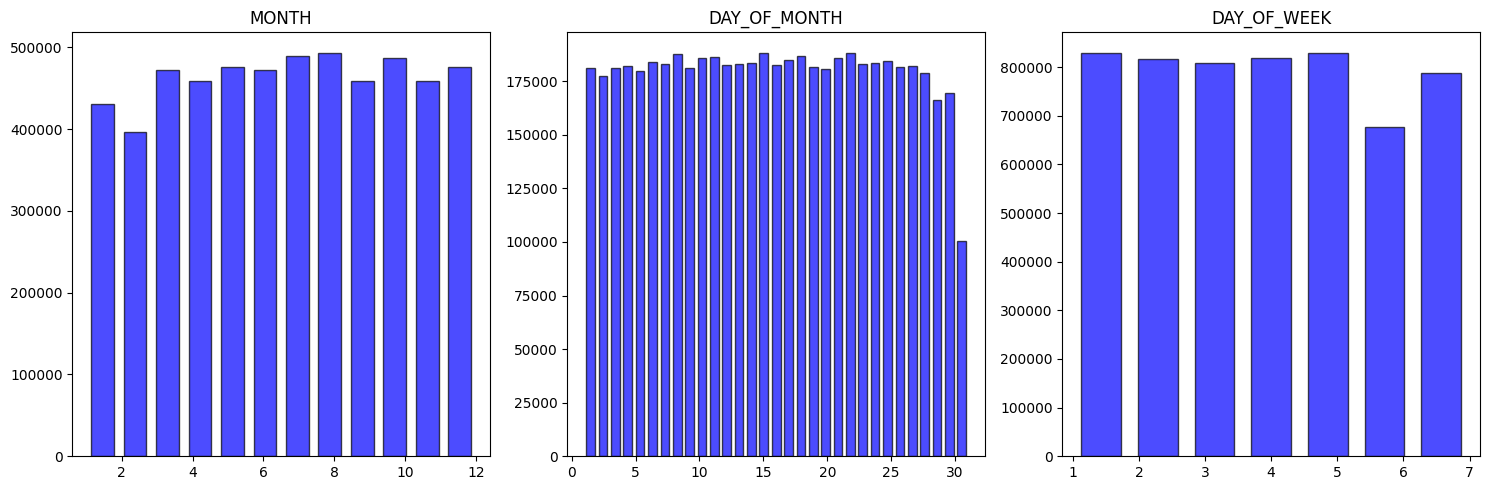

In [16]:
#Visualizing date related distributions
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(15, 5))  # 1 rows, 3 columns
axs = axs.flatten()

for i, col in enumerate(ontime_reporting_export.loc[:,["MONTH","DAY_OF_MONTH","DAY_OF_WEEK"]]):
    axs[i].hist(ontime_reporting_export[col], bins=ontime_reporting_export[col].nunique(), color='blue', alpha=0.7, ec='black', rwidth=0.7)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()

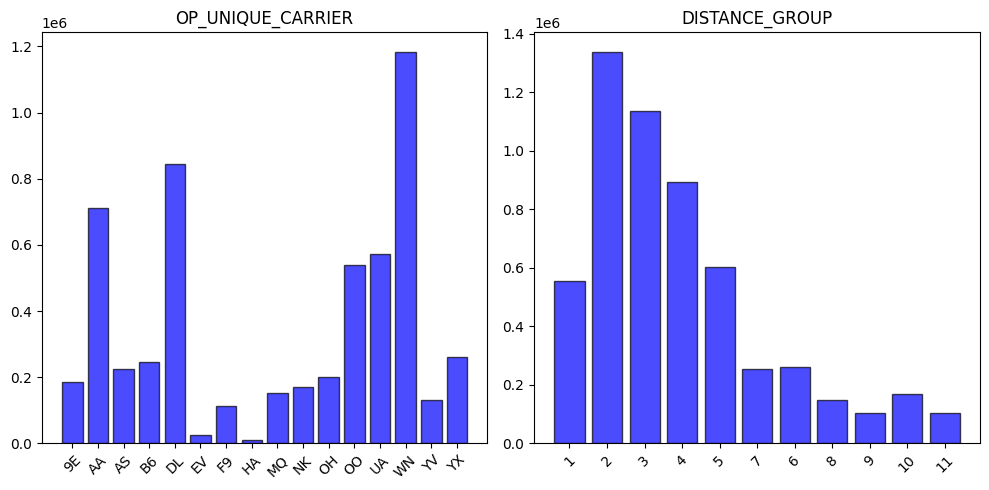

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["OP_UNIQUE_CARRIER","DISTANCE_GROUP"]]

for i, col in enumerate(columns):
    value_counts = ontime_reporting_export[col].value_counts().sort_index()
    axs[i].bar(value_counts.index, value_counts.values, color='blue', alpha=0.7, edgecolor='black')
    axs[i].set_title(col)
    axs[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

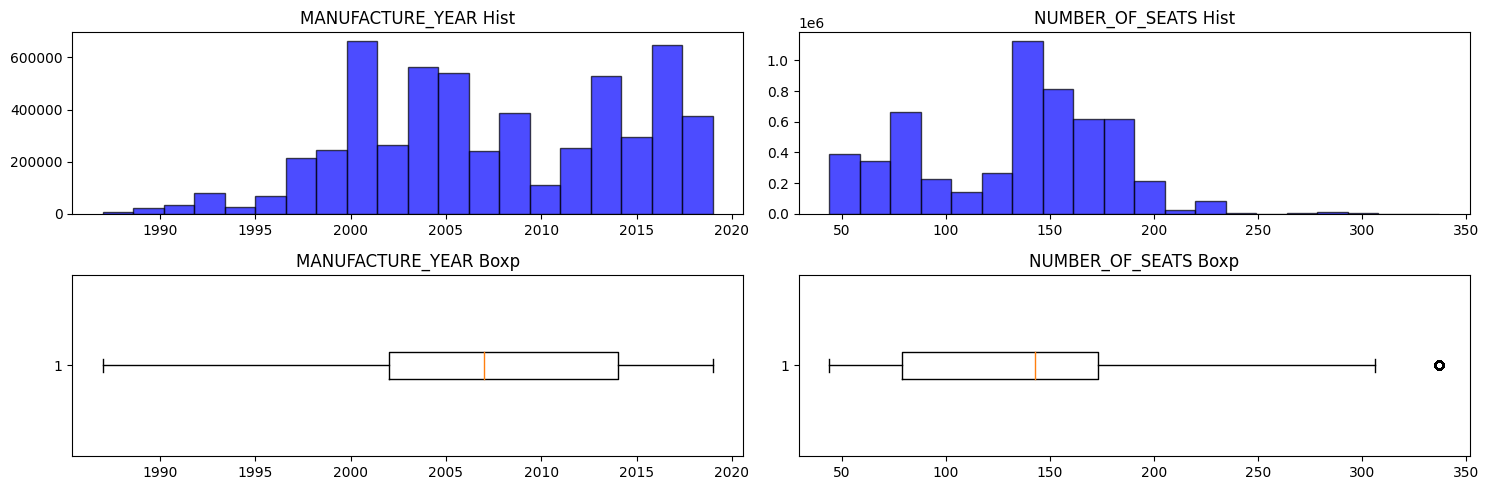

In [18]:
#Visualizing aircraft related distributions + boxplot
fig, axs = plt.subplots(2, 2, figsize=(15, 5))  # 2 rows, 2 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["MANUFACTURE_YEAR","NUMBER_OF_SEATS"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=20, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

for i, col in enumerate(columns):
    axs[i + len(columns.columns)].boxplot(ontime_reporting_export[col], vert=False)
    axs[i + len(columns.columns)].set_title(col + ' Boxp')

plt.tight_layout()
plt.show()

## 2.1 Dropping outliers: Destination & Origin <a name="Dropping outliers: Destination & Origin"></a>

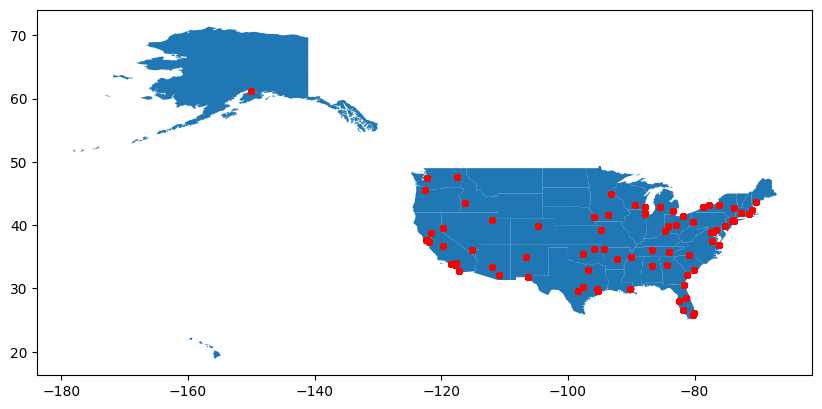

In [19]:
# Create Point objects for ORIGIN coordinates
origin_coordinates = [Point(xy) for xy in zip(ontime_reporting_export['ORIGIN_LONG'], ontime_reporting_export['ORIGIN_LAT'])]
origin_gdf = GeoDataFrame(ontime_reporting_export, geometry=origin_coordinates)

# Load the US States map
us_states = gpd.read_file("./US States map/States_shapefile.shp")

ax = us_states.plot(figsize=(10, 6))
origin_gdf.plot(ax=ax, marker='o', color='red', markersize=15, label='Origin')

plt.show()

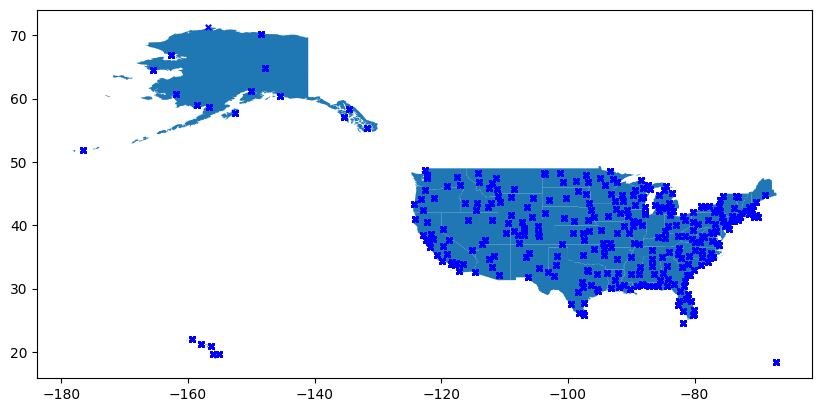

In [20]:
# Create Point objects for DESTINATION coordinates
dest_coordinates = [Point(xy) for xy in zip(ontime_reporting_export['DEST_LONG'], ontime_reporting_export['DEST_LAT'])]
dest_gdf = GeoDataFrame(ontime_reporting_export, geometry=dest_coordinates)

# Load the US States map
us_states = gpd.read_file("./US States map/States_shapefile.shp")

ax = us_states.plot(figsize=(10, 6))
dest_gdf.plot(ax=ax, marker='x', color='blue', markersize=15, label='Destination')

plt.show()

(5567978, 25)
['New York' 'Newark' 'Orlando' 'Fort Lauderdale']
(5565741, 25)


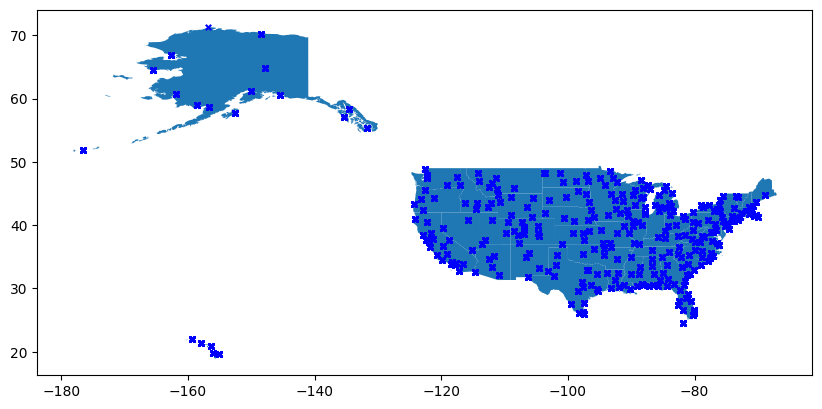

In [21]:
#Drop the right bottom value as there is no valid US airport there
print(ontime_reporting_export.shape)
temp = ontime_reporting_export.loc[(ontime_reporting_export['DEST_LONG'] > -75) & (ontime_reporting_export['DEST_LAT'] < 20)]
print(temp["ORIGIN_CITY_NAME"].unique())
ontime_reporting_export.drop(ontime_reporting_export.loc[(ontime_reporting_export['DEST_LONG'] > -75) & (ontime_reporting_export['DEST_LAT'] < 20)].index, inplace=True)
print(ontime_reporting_export.shape)

# Create Point objects for DESTINATION coordinates
dest_coordinates = [Point(xy) for xy in zip(ontime_reporting_export['DEST_LONG'], ontime_reporting_export['DEST_LAT'])]
dest_gdf = GeoDataFrame(ontime_reporting_export, geometry=dest_coordinates)

# Load the US States map
us_states = gpd.read_file("./US States map/States_shapefile.shp")

ax = us_states.plot(figsize=(10, 6))
dest_gdf.plot(ax=ax, marker='x', color='blue', markersize=15, label='Destination')

plt.show()

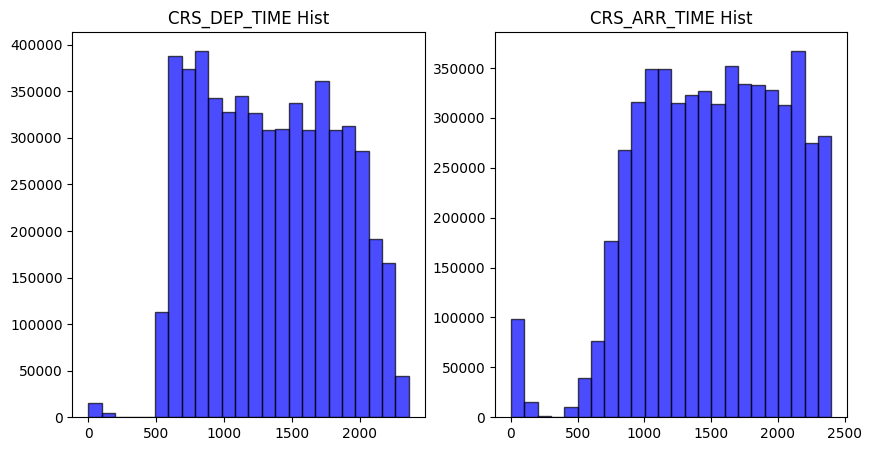

In [26]:
#CRS_DEP_TIME CRS_ARR_TIME
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 rows, 2 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["CRS_DEP_TIME","CRS_ARR_TIME"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=24, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

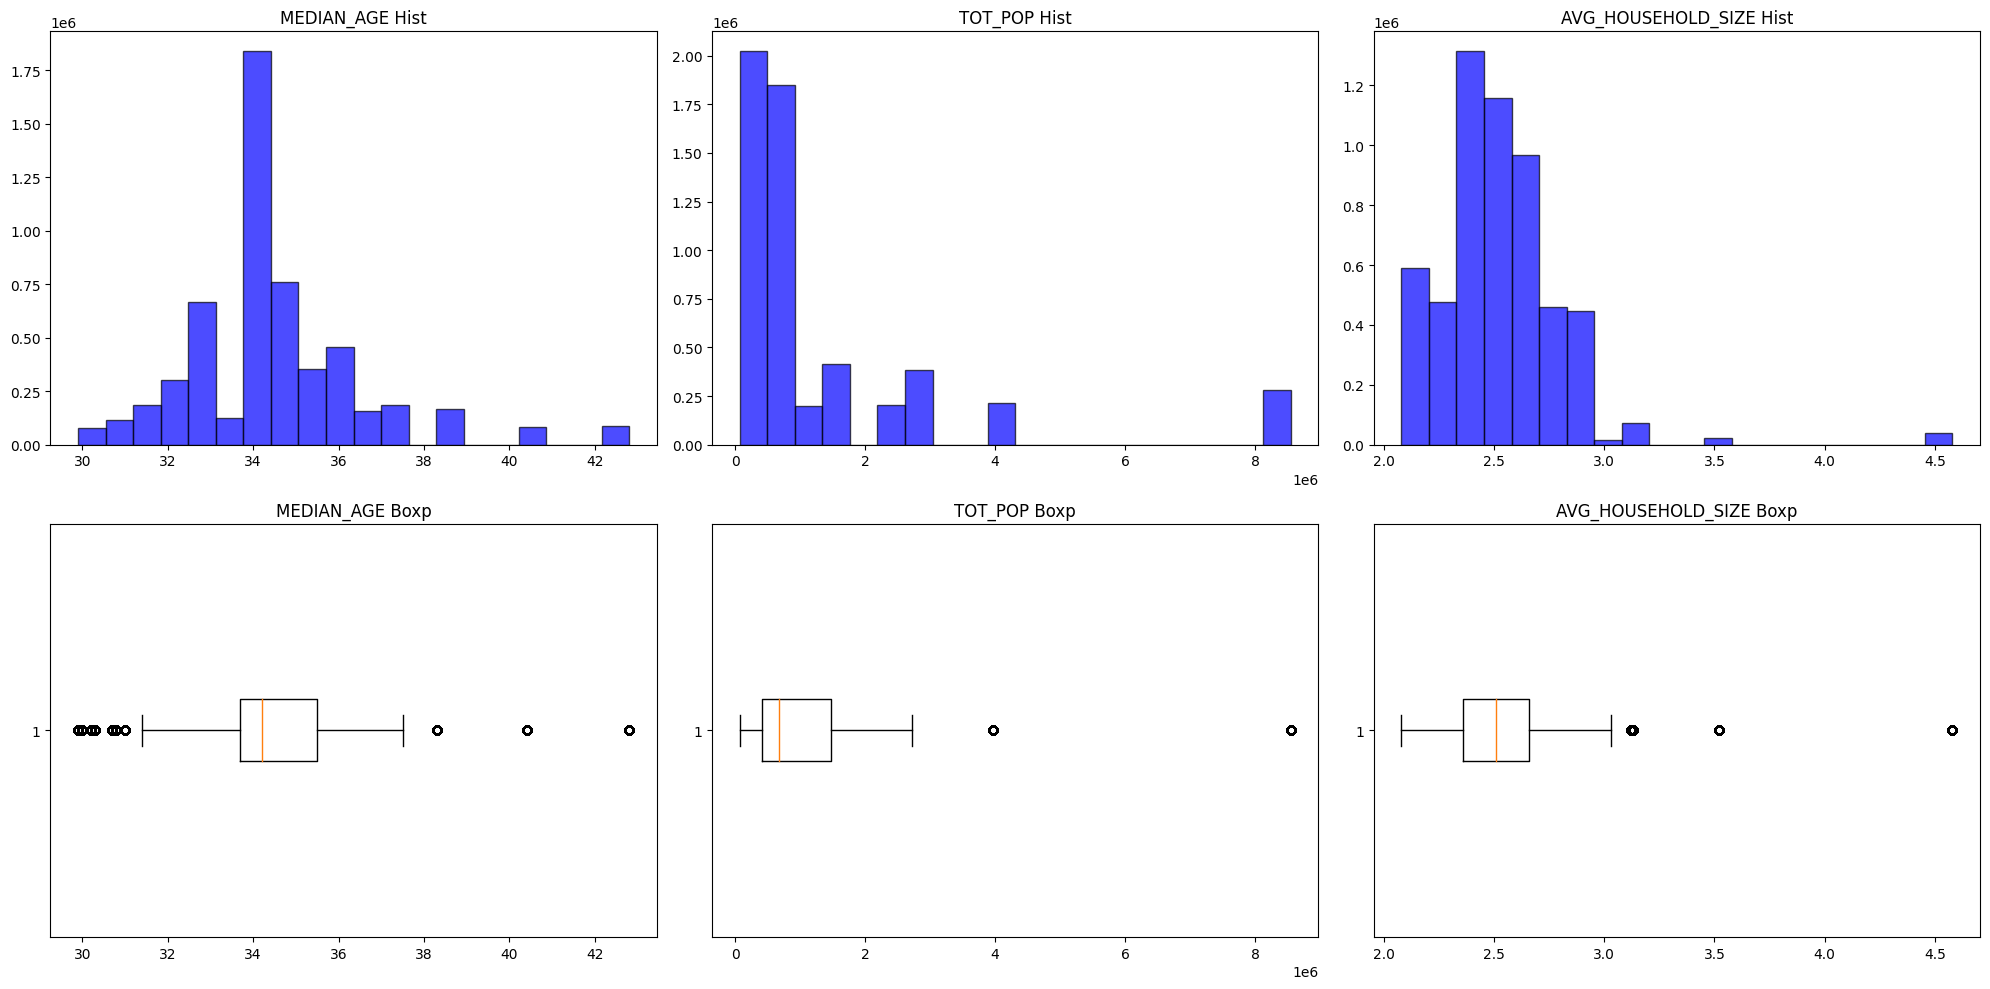

In [27]:
#Visualizing city related distributions + boxplot
fig, axs = plt.subplots(2, 3, figsize=(20, 10))  # 2 rows, 3 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["MEDIAN_AGE","TOT_POP","AVG_HOUSEHOLD_SIZE"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=20, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

for i, col in enumerate(columns):
    axs[i + len(columns.columns)].boxplot(ontime_reporting_export[col], vert=False)
    axs[i + len(columns.columns)].set_title(col + ' Boxp')

plt.tight_layout()
plt.show()

# 3. Feature Engineering

## 3.1 Previous flight delayed (bool)

In [5]:
#Feature Enginering of "Previous_flight_delayed"
ontime_reporting_export = ontime_reporting_export.sort_values(['MONTH', 'DAY_OF_MONTH', 'TAIL_NUM', 'CRS_DEP_TIME'])
ontime_reporting_export["PREV_FLIGHT_DELAY"] = 0
ontime_reporting_export.loc[(ontime_reporting_export["TAIL_NUM"] == ontime_reporting_export["TAIL_NUM"].shift(1)) & (ontime_reporting_export["DEP_DEL15"].shift(1) == True), "PREV_FLIGHT_DELAY"] = 1
print(ontime_reporting_export.shape)

(5567978, 26)


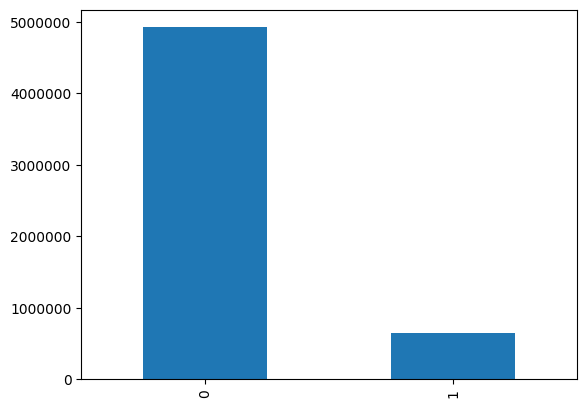

0: 88.42% and 1: 11.58%


In [7]:
plt.ticklabel_format(style='plain')
#ontime_reporting_export["DEP_DEL15"] = ontime_reporting_export["DEP_DEL15"]
ontime_reporting_export["PREV_FLIGHT_DELAY"].value_counts().plot(kind='bar')
plt.show()
print("0: {}% and 1: {}%".format(
    round(len(ontime_reporting_export[ontime_reporting_export.PREV_FLIGHT_DELAY == 0])/len(ontime_reporting_export.PREV_FLIGHT_DELAY)*100,2), 
    round(len(ontime_reporting_export[ontime_reporting_export.PREV_FLIGHT_DELAY == 1])/len(ontime_reporting_export.PREV_FLIGHT_DELAY)*100,2)
    )
)

## 3.2 Airplane age

In [11]:
#Airplane age: build year - 2019
ontime_reporting_export['PLANE_AGE'] = 2019 - ontime_reporting_export['MANUFACTURE_YEAR']
ontime_reporting_export = ontime_reporting_export.drop(columns=["MANUFACTURE_YEAR"])
print(ontime_reporting_export.shape)

(5567978, 26)


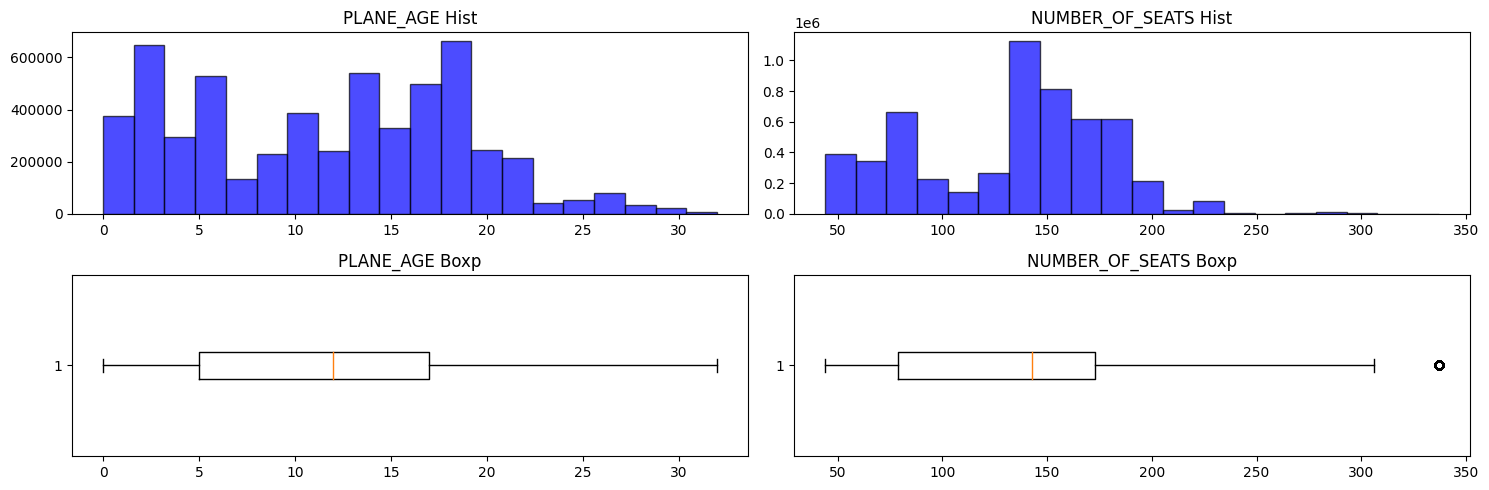

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(15, 5))  # 2 rows, 2 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["PLANE_AGE","NUMBER_OF_SEATS"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=20, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

for i, col in enumerate(columns):
    axs[i + len(columns.columns)].boxplot(ontime_reporting_export[col], vert=False)
    axs[i + len(columns.columns)].set_title(col + ' Boxp')

plt.tight_layout()
plt.show()

## 3.3 Minutes from midnight for Departure and Arrival time

In [8]:
#Convert military time to minutes from midnight
def military_time_to_minutes(military_time):
    hours = military_time // 100
    minutes = military_time % 100
    total_minutes = (hours * 60) + minutes
    return total_minutes

ontime_reporting_export["CRS_DEP_TIME"] = ontime_reporting_export["CRS_DEP_TIME"].apply(lambda x: military_time_to_minutes(x))
ontime_reporting_export["CRS_ARR_TIME"] = ontime_reporting_export["CRS_ARR_TIME"].apply(lambda x: military_time_to_minutes(x))
print(ontime_reporting_export.shape)


(5567978, 26)


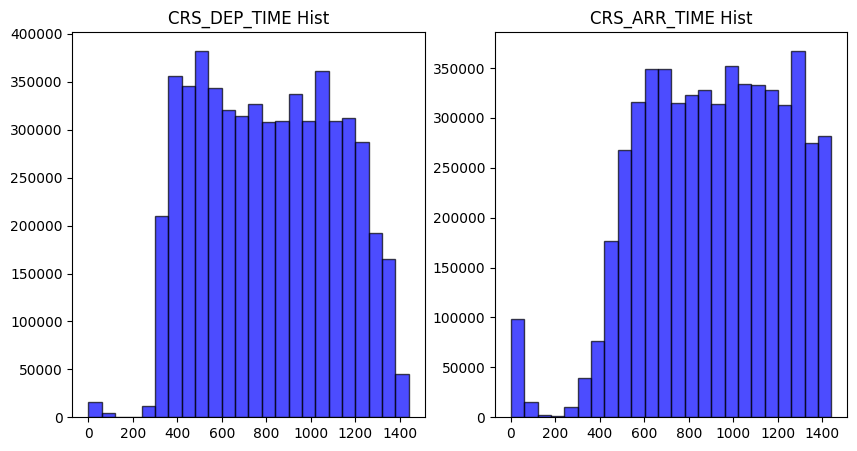

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))  # 1 rows, 2 columns
axs = axs.flatten()

columns = ontime_reporting_export.loc[:,["CRS_DEP_TIME","CRS_ARR_TIME"]]

for i, col in enumerate(columns):
    axs[i].hist(ontime_reporting_export[col], bins=24, color='blue', alpha=0.7, ec='black')
    axs[i].set_title(col + ' Hist')

## 3.4 Drop redudant columns

In [31]:
#Dropping redudant and meaningless features used for merging and feature engineering
print(ontime_reporting_export.shape)
ontime_reporting_export = ontime_reporting_export.drop(columns=["TAIL_NUM", "ORIGIN_CITY_NAME", "ORIGIN_AIRPORT_ID"])
print(ontime_reporting_export.shape)

(5565741, 26)
(5565741, 23)


In [40]:
pd.set_option('display.max_columns', None)
ontime_reporting_export.tail(10)

,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,CRS_DEP_TIME,DEP_DEL15,CRS_ARR_TIME,DISTANCE_GROUP,NUMBER_OF_SEATS,AWND,PRCP,SNOW,SNWD,TMAX,MEDIAN_AGE,TOT_POP,AVG_HOUSEHOLD_SIZE,ORIGIN_LAT,ORIGIN_LONG,DEST_LAT,DEST_LONG,PREV_FLIGHT_DELAY,PLANE_AGE
6392614,12,31,2,DL,742,0,884,2,149,8.72,0.00,0.0,0.0,51.0,34.1,655760,2.55,35.0424,-89.9767,33.6367,-84.4281,0,27
5149390,12,31,2,DL,924,0,1014,2,149,11.86,0.00,0.0,0.0,56.0,33.8,463875,2.15,33.6367,-84.4281,27.3954,-82.5544,0,27
2433552,12,31,2,B6,1111,1,1296,4,200,9.40,0.01,0.0,0.0,46.0,36.0,8550405,2.68,40.6397,-73.7789,28.4294,-81.3090,0,1
1226116,12,31,2,AA,512,0,704,10,160,7.61,0.00,0.0,0.0,53.0,33.8,672228,2.24,38.9445,-77.4558,33.9425,-118.4080,0,3
3420599,12,31,2,AA,796,0,1265,10,160,5.82,0.00,0.0,0.0,73.0,35.0,3971896,2.86,33.9425,-118.4080,38.8522,-77.0378,0,3
1875536,12,31,2,DL,524,0,590,3,149,11.86,0.00,0.0,0.0,56.0,33.8,463875,2.15,33.6367,-84.4281,42.9472,-87.8966,0,27
6399838,12,31,2,DL,635,0,817,3,149,11.86,0.06,1.1,2.0,30.0,31.6,600154,2.51,42.9472,-87.8966,33.6367,-84.4281,0,27
2374434,12,31,2,DL,870,0,957,2,149,11.86,0.00,0.0,0.0,56.0,33.8,463875,2.15,33.6367,-84.4281,39.9980,-82.8919,0,27
6311201,12,31,2,DL,1002,0,1104,2,149,17.00,0.00,0.0,0.0,37.0,33.7,200579,2.62,39.9980,-82.8919,33.6367,-84.4281,0,27
5031389,12,31,2,DL,1285,0,1375,2,149,11.86,0.00,0.0,0.0,56.0,33.8,463875,2.15,33.6367,-84.4281,28.1028,-80.6453,0,27


<AxesSubplot: >

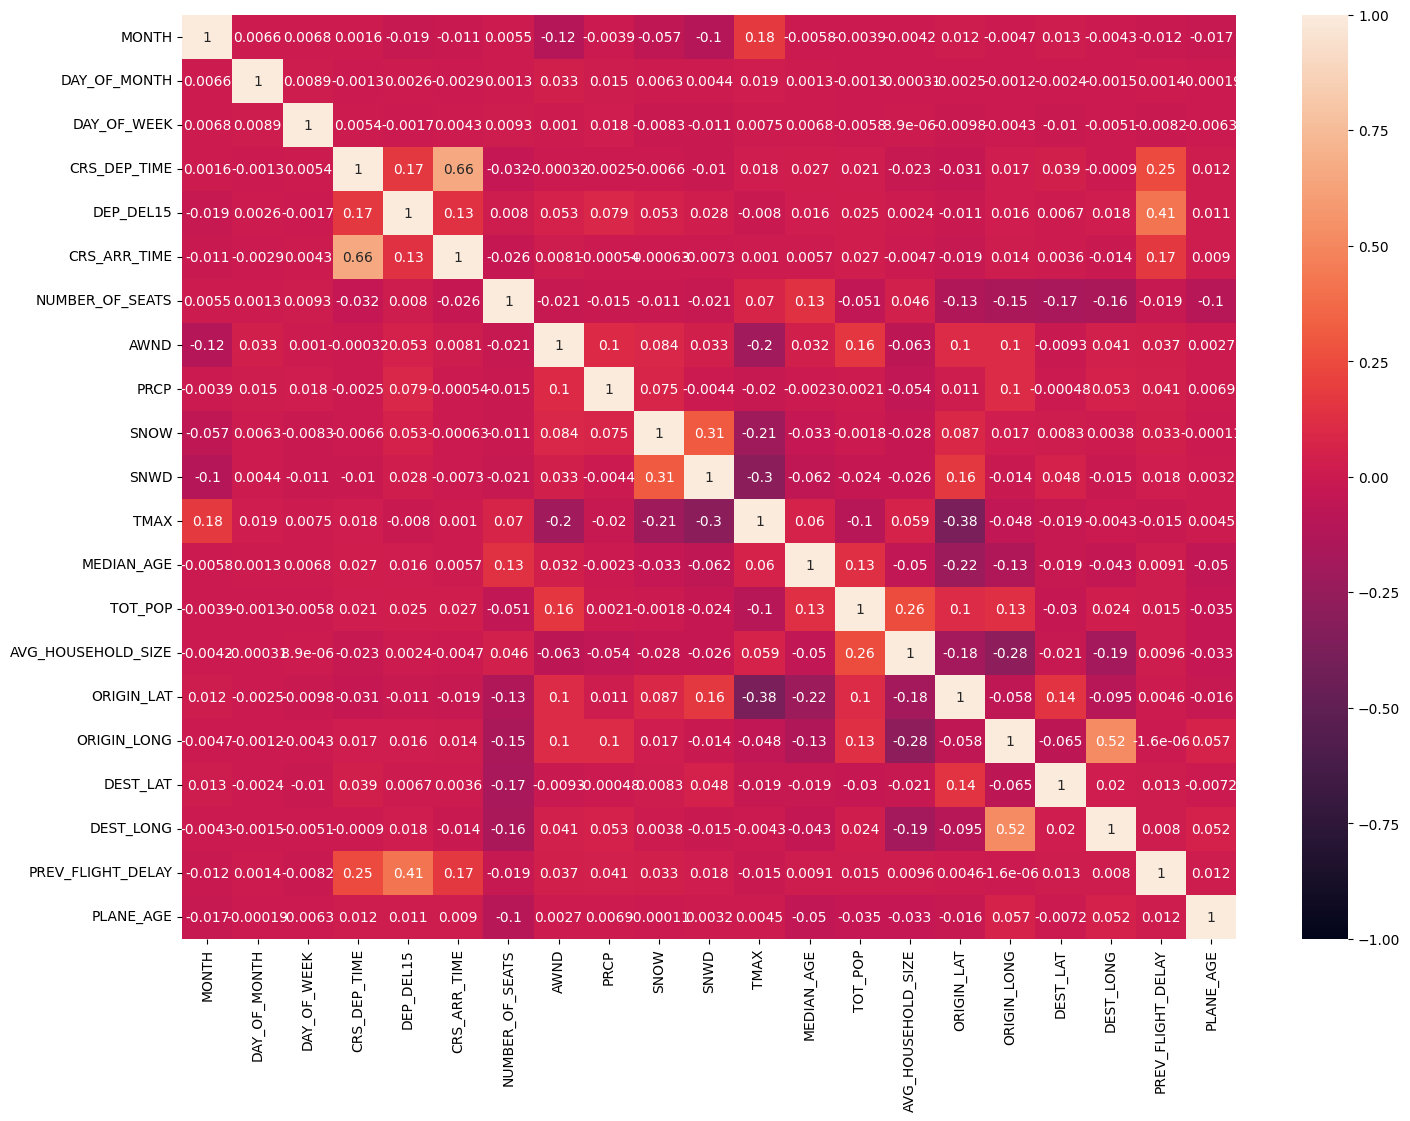

In [34]:
plt.figure(figsize=(17, 12))
sns.heatmap(ontime_reporting_export.corr(numeric_only=True), vmin=-1, vmax=1, annot=True)

## 4. Exporting clean data

In [35]:
#Exporting the cleaned dataset
ontime_reporting_export.to_csv(path_import_and_export + "ontime_reporting_clean_export.csv", index=False)